In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
print(os.getcwd())
print(os.listdir("/Users/shrutibalaji/Downloads/vindr-mammo-master 2/dicom_data/"))

/Users/shrutibalaji/Downloads/vindr-mammo-master 2
['preprocessed_data', '.DS_Store', 'images', 'finding_annotations.csv', 'breast-level_annotations.csv', 'annotation_testtry1.csv', 'metadata.csv', 'BIRADS-3,4,5.numbers', 'SHA256SUMS.txt']


In [27]:
# Load the annotation data
df = pd.read_csv('/Users/shrutibalaji/Downloads/vindr-mammo-master 2/dicom_data/annotation_testtry1.csv')
# Function to draw bounding box
def draw_bounding_box(ax, xmin, ymin, xmax, ymax, color='r', linewidth=2):
    width = xmax - xmin
    height = ymax - ymin
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor=color, linewidth=linewidth)
    ax.add_patch(rect)

In [29]:
print(df)

                            study_id                         series_id  \
0   006f2e9cb3256c02fe82a7ff29af6260  5b60d1c3df5150b7e8222b40021fb338   
1   006f2e9cb3256c02fe82a7ff29af6260  5b60d1c3df5150b7e8222b40021fb338   
2   006f2e9cb3256c02fe82a7ff29af6260  5b60d1c3df5150b7e8222b40021fb338   
3   006f2e9cb3256c02fe82a7ff29af6260  5b60d1c3df5150b7e8222b40021fb338   
4   008b8e61390fcb4c0873258c15b0a53a  bd0e137f3fc5b069db934797924d7d99   
5   008b8e61390fcb4c0873258c15b0a53a  bd0e137f3fc5b069db934797924d7d99   
6   0025a5dc99fd5c742026f0b2b030d3e9  47d59b788d64eecab165d97471c4131a   
7   0025a5dc99fd5c742026f0b2b030d3e9  47d59b788d64eecab165d97471c4131a   
8   0025a5dc99fd5c742026f0b2b030d3e9  47d59b788d64eecab165d97471c4131a   
9   0025a5dc99fd5c742026f0b2b030d3e9  47d59b788d64eecab165d97471c4131a   
10  0028fb2c7f0b3a5cb9a80cb0e1cdbb91  ff5d6ba6e303628092020e897fcbc9b1   
11  0028fb2c7f0b3a5cb9a80cb0e1cdbb91  ff5d6ba6e303628092020e897fcbc9b1   
12  0028fb2c7f0b3a5cb9a80cb0e1cdbb91  

In [30]:
# Function to load and display image with bounding boxes
def display_image_with_boxes(image_id, annotations):
    # Load the image
    image_path = f'/Users/shrutibalaji/Downloads/vindr-mammo-master 2/preprocessed_data/X_{annotations.iloc[0]["split"]}_{image_id}.npy'
    image = np.load(image_path)

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Display the image
    ax.imshow(image, cmap='gray')
    
    # Draw bounding boxes
    for _, row in annotations.iterrows():
        draw_bounding_box(ax, row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        
    # Set title
    ax.set_title(f"Image ID: {image_id}, BI-RADS: {annotations.iloc[0]['breast_birads']}")
    
    plt.axis('off')
    plt.show()



In [31]:
# Group annotations by image_id
grouped = df.groupby('image_id')
print(grouped)
# Display images with bounding boxes
for image_id, annotations in grouped:
    display_image_with_boxes(image_id, annotations)
    #print(image_id, annotations)


FileNotFoundError: [Errno 2] No such file or directory: '/Users/shrutibalaji/Downloads/vindr-mammo-master 2/preprocessed_data/X_training_14bffe41f224fce0afdd90c35c0abacb.npy'

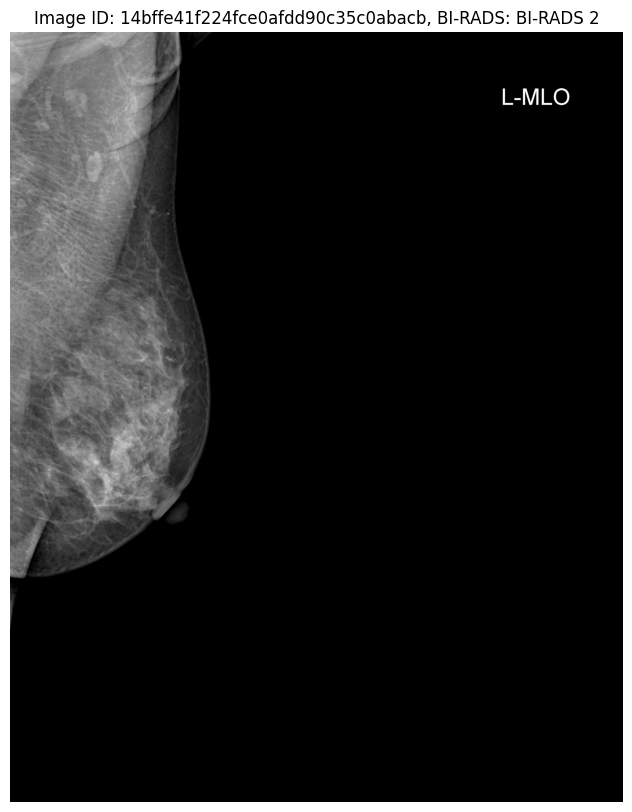

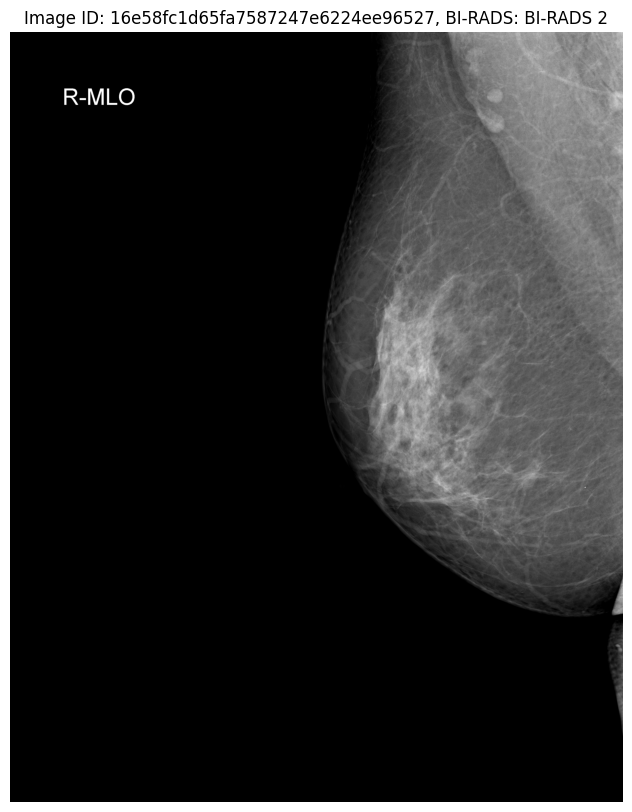

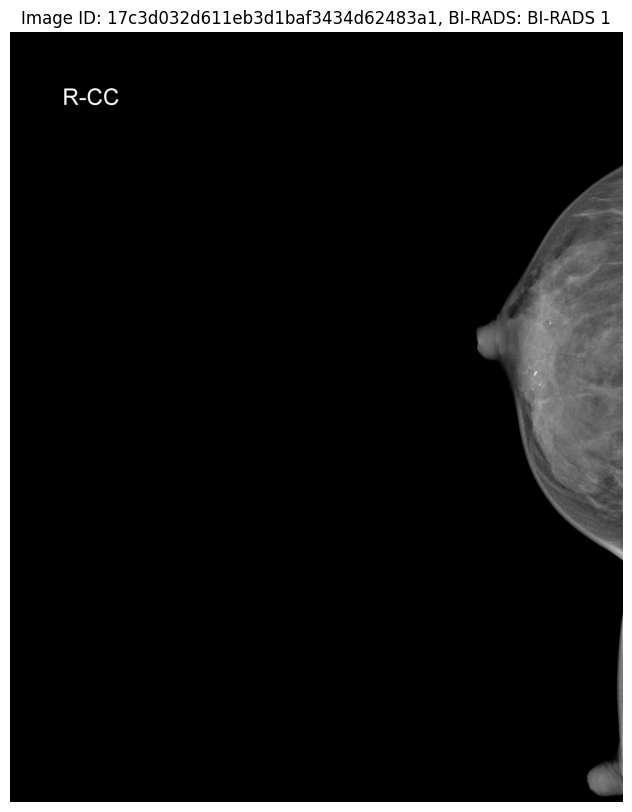

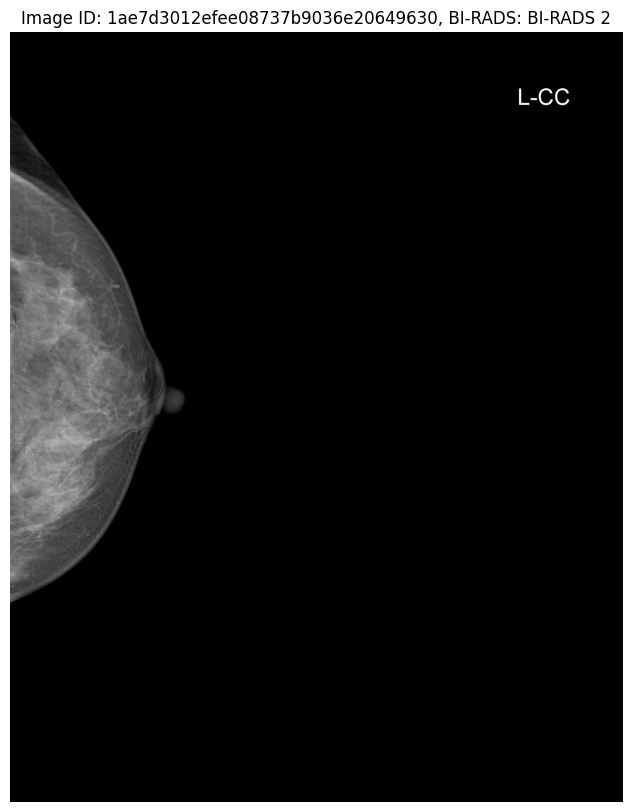

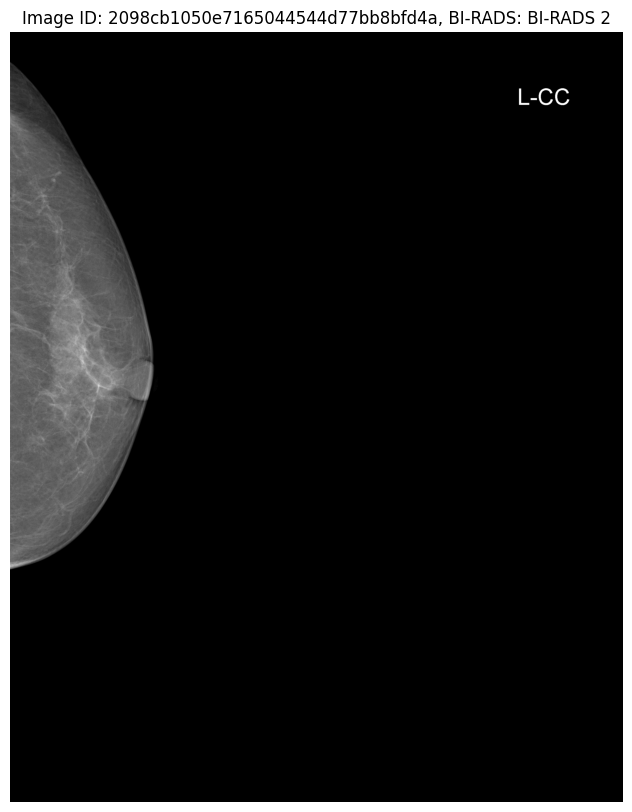

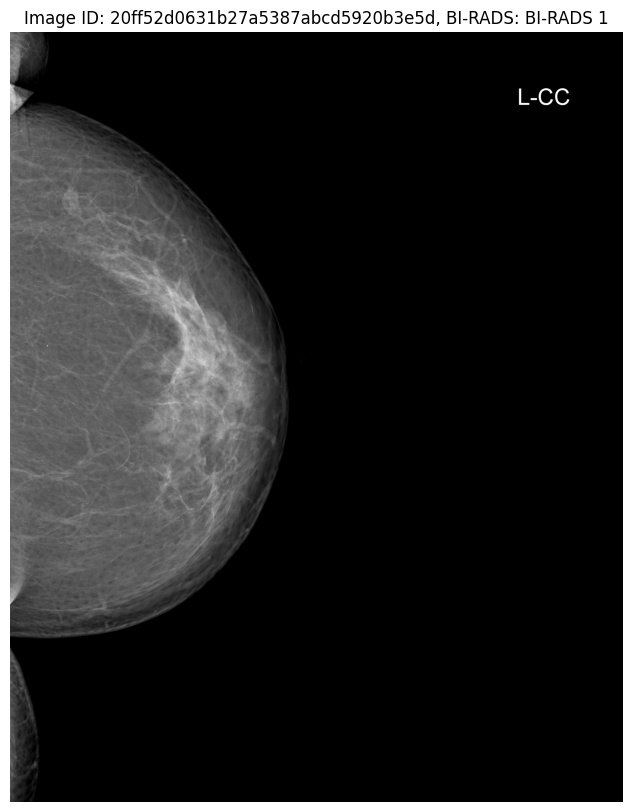

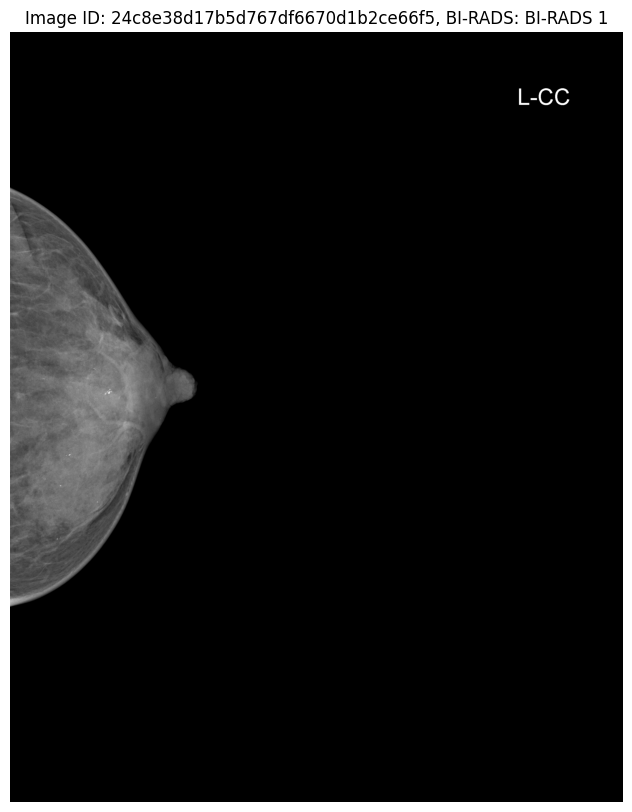

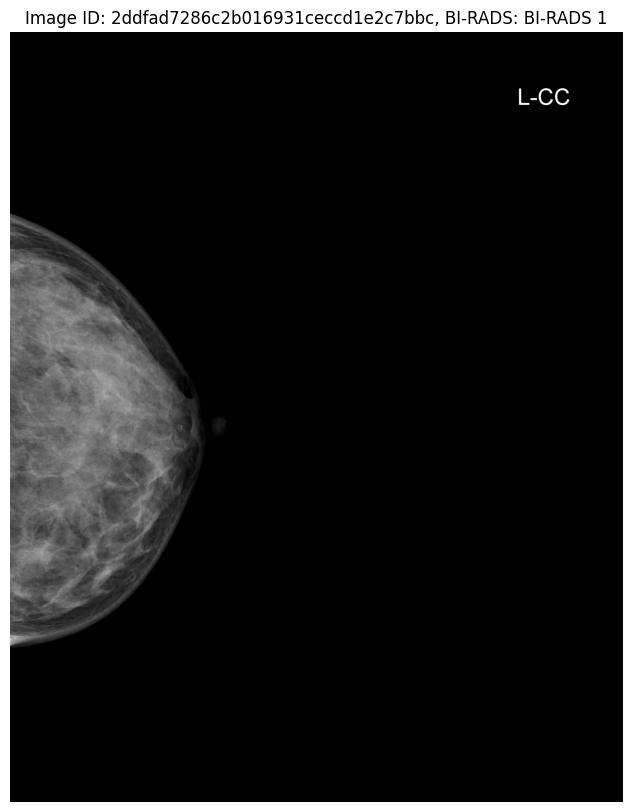

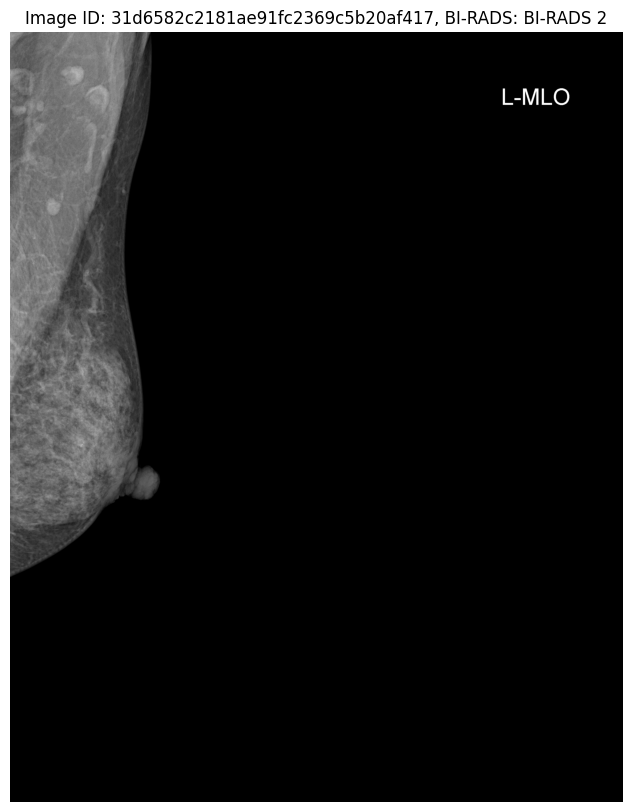

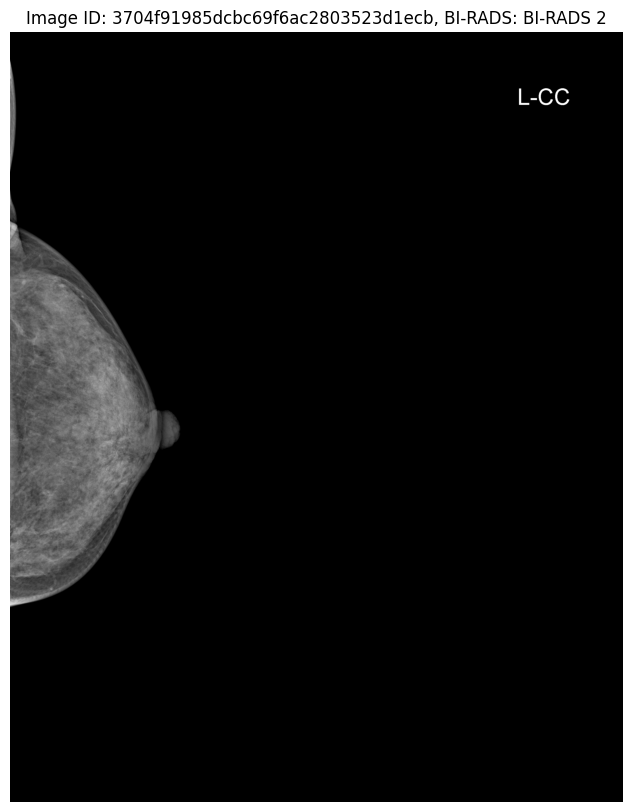

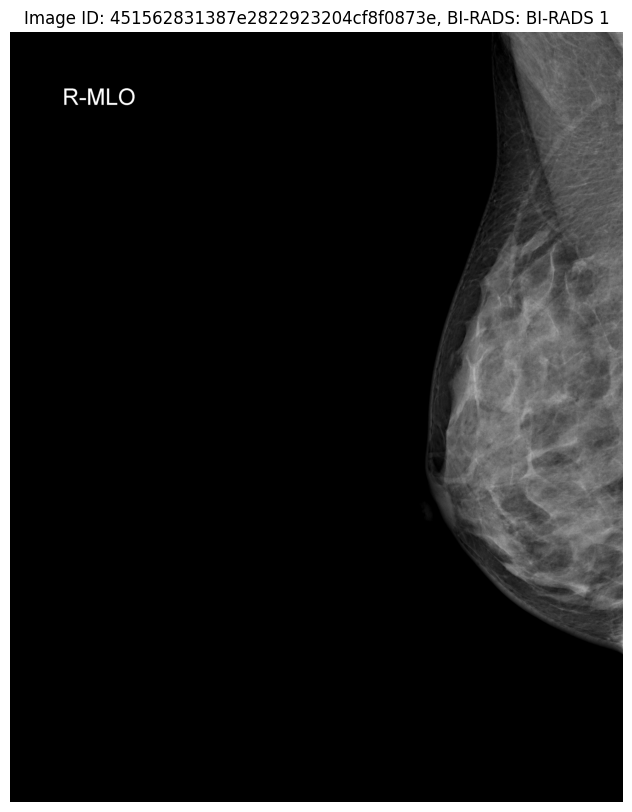

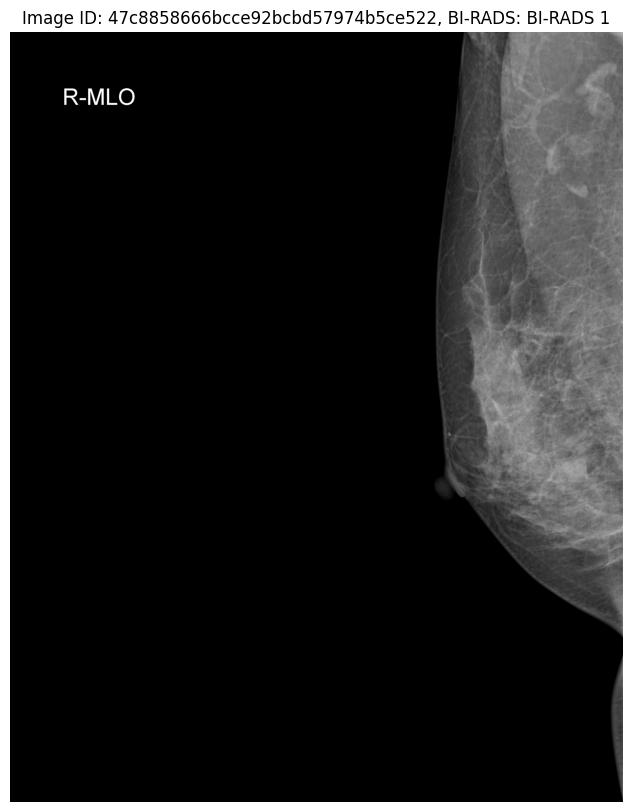

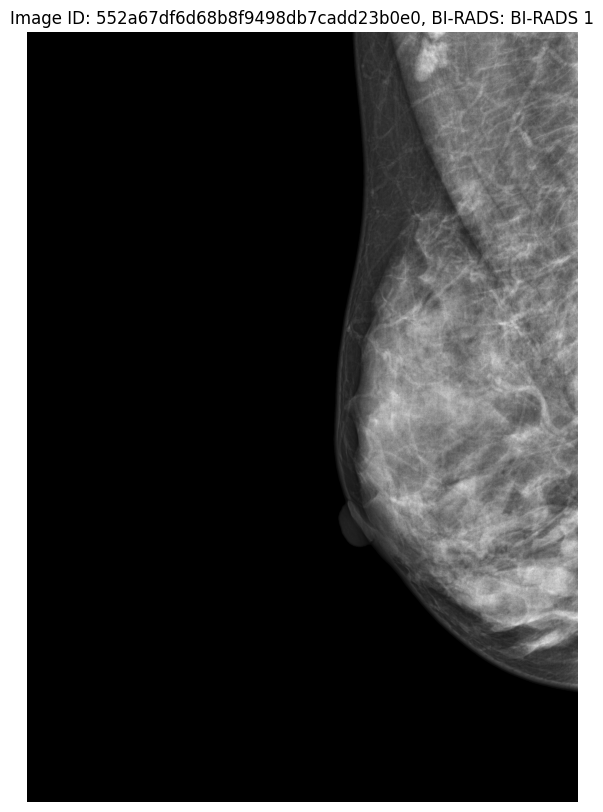

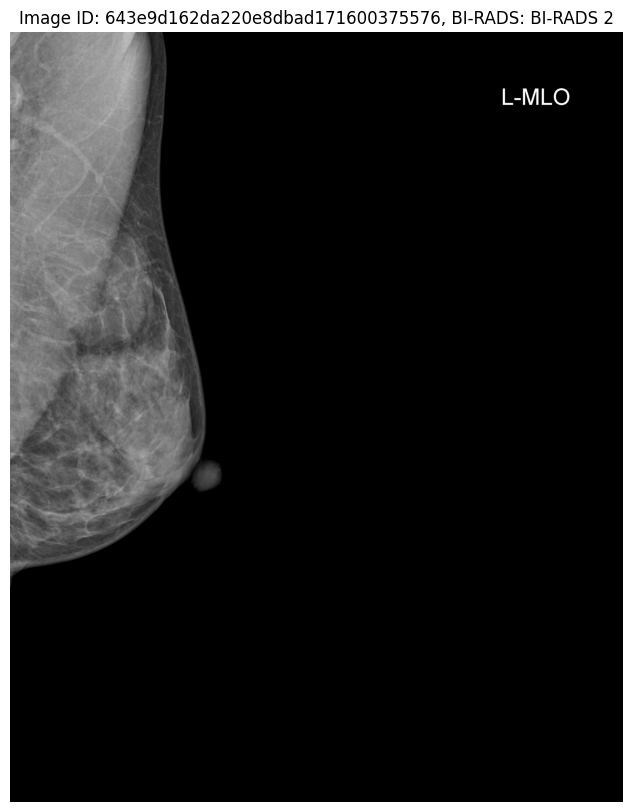

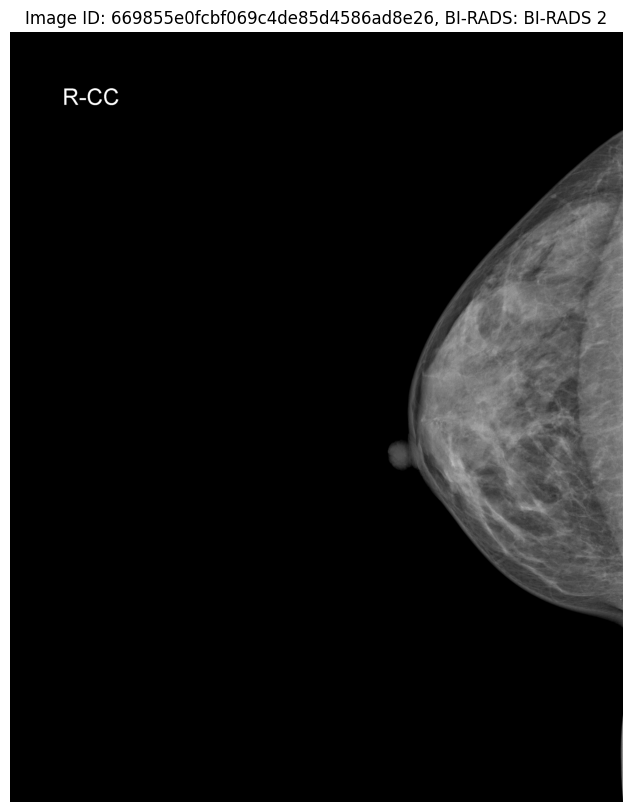

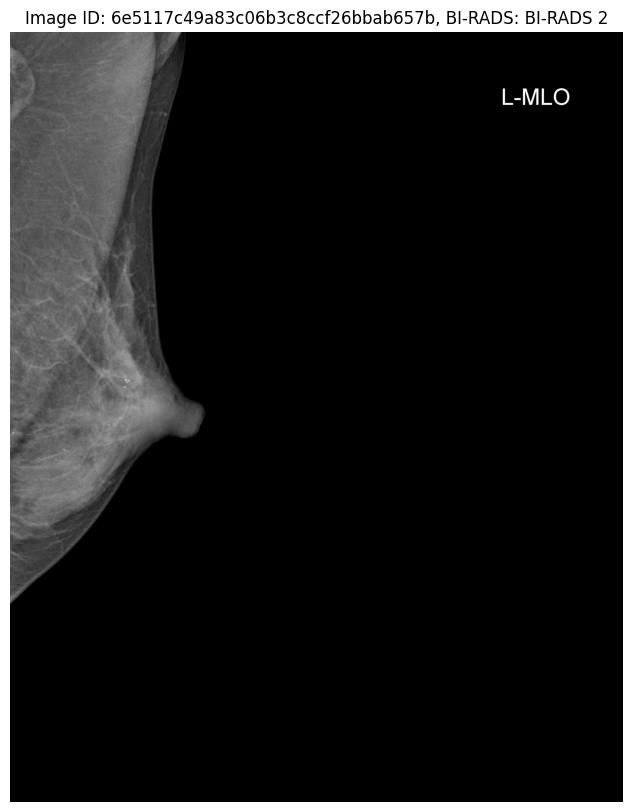

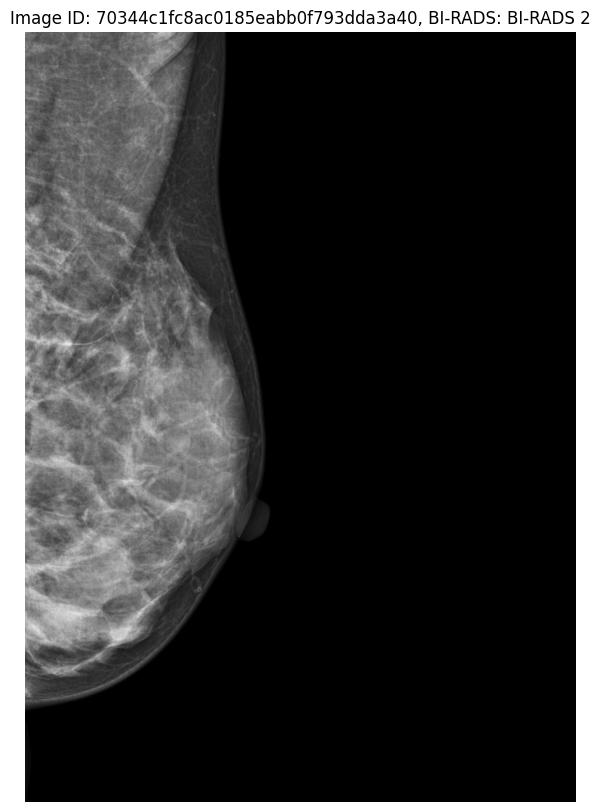

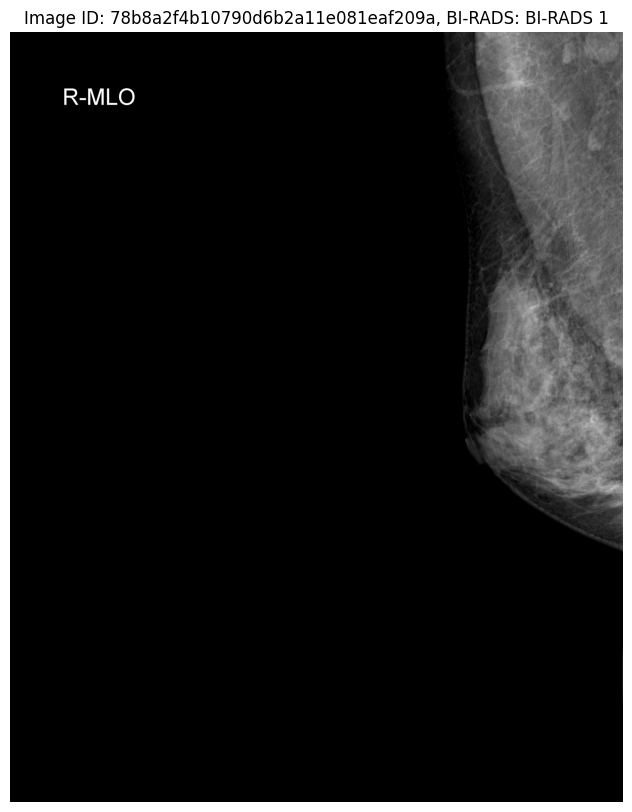

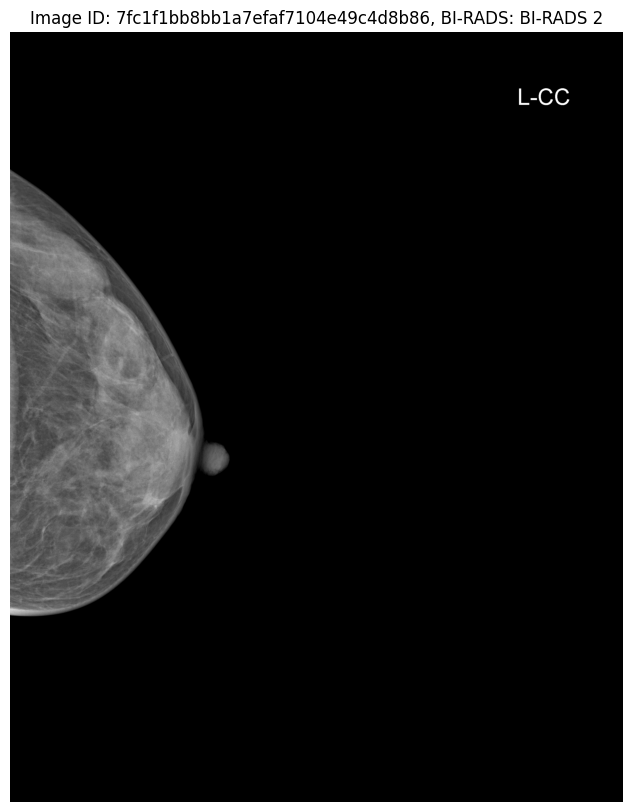

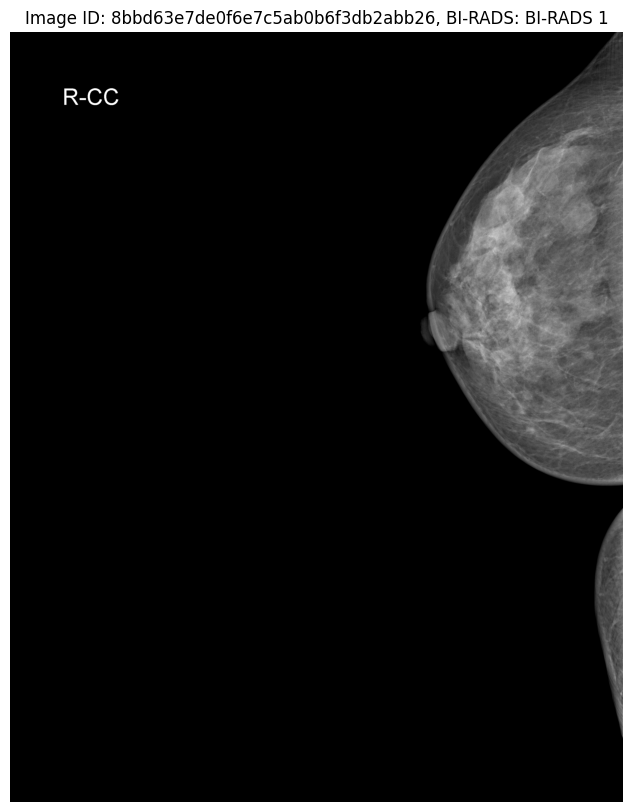

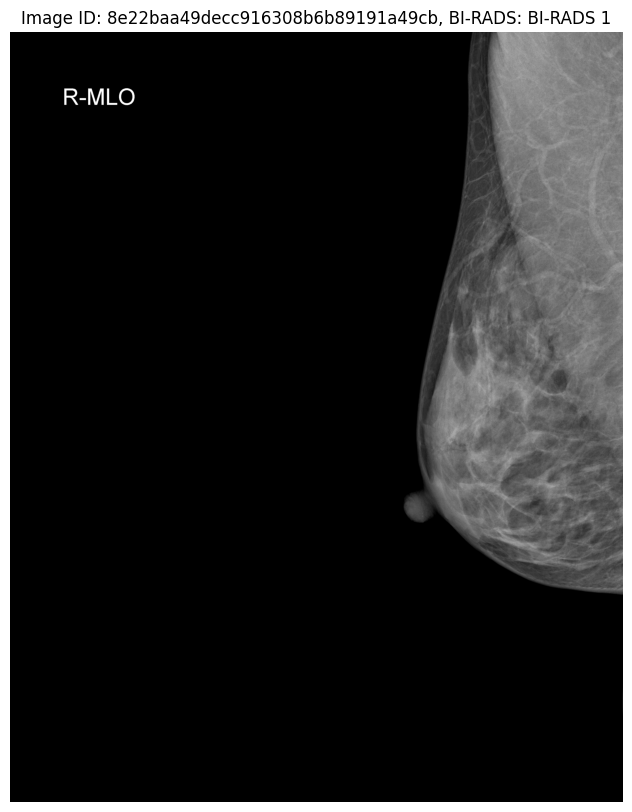

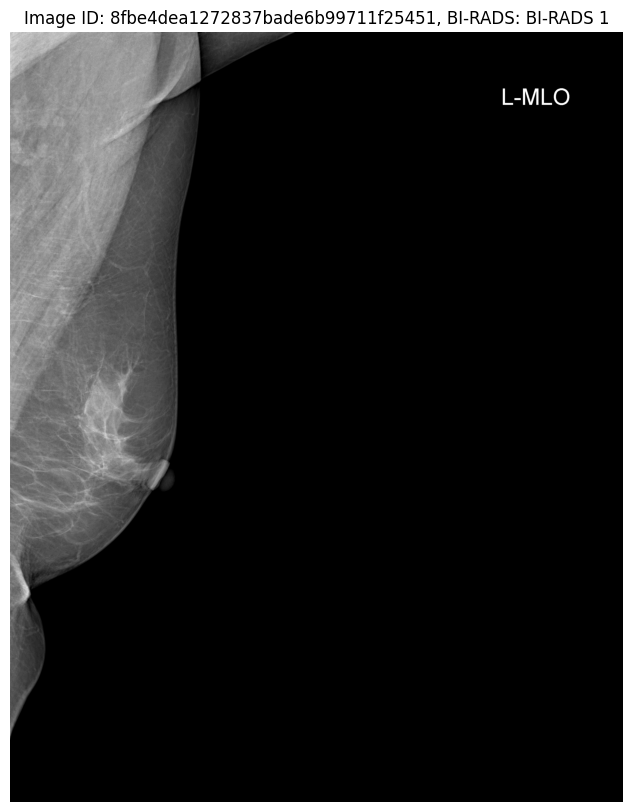

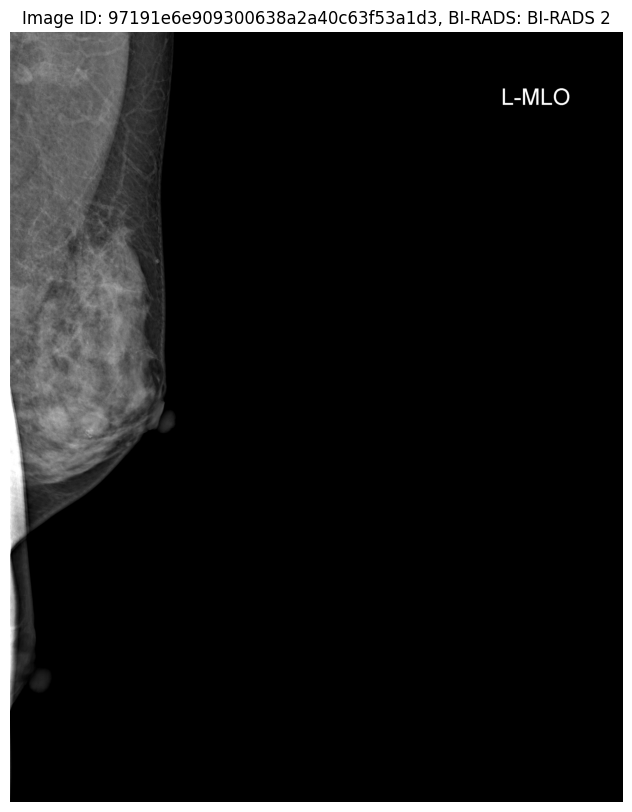

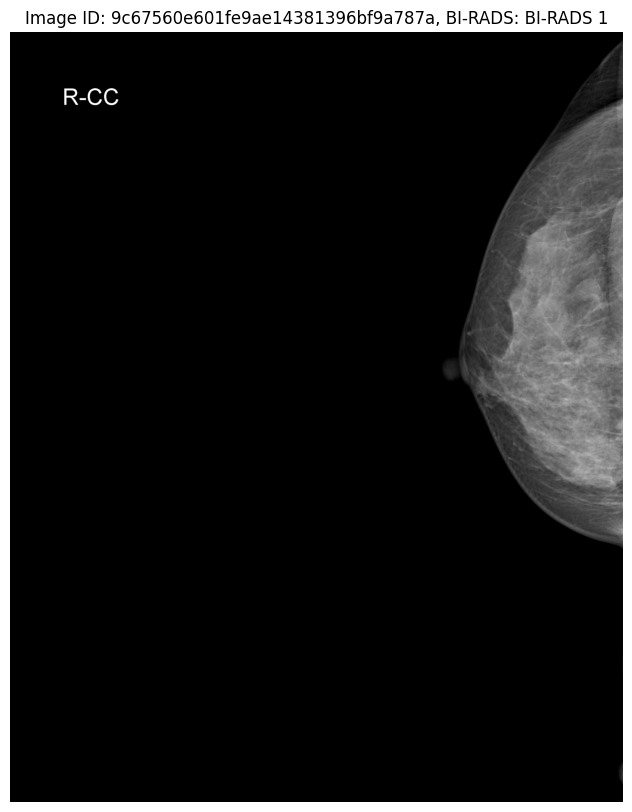

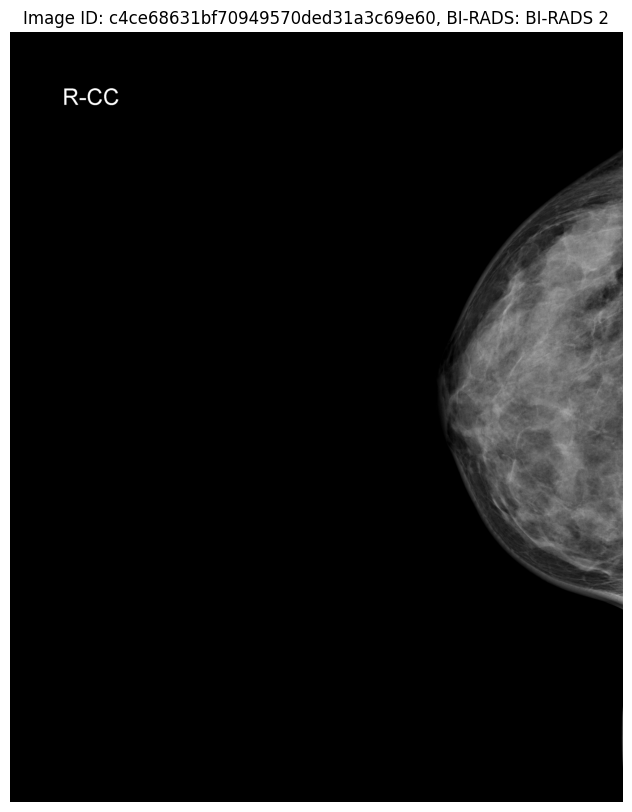

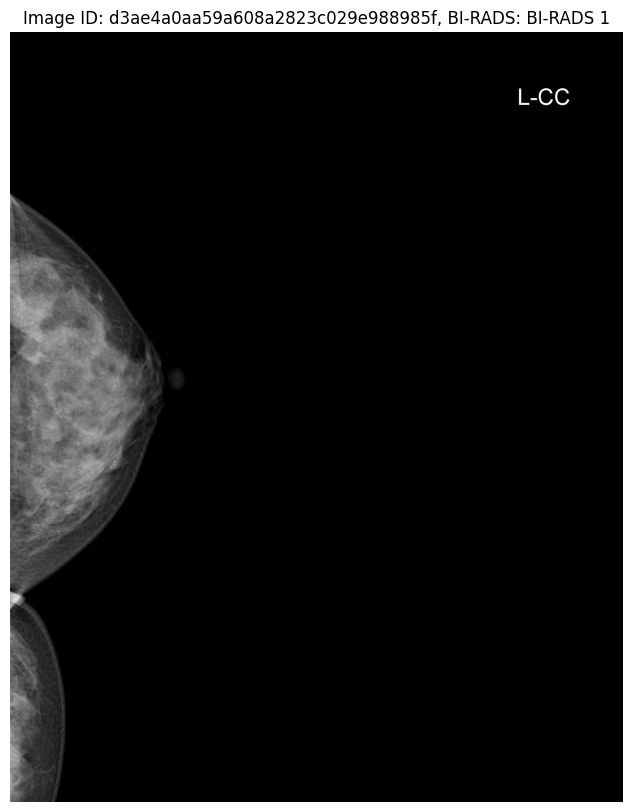

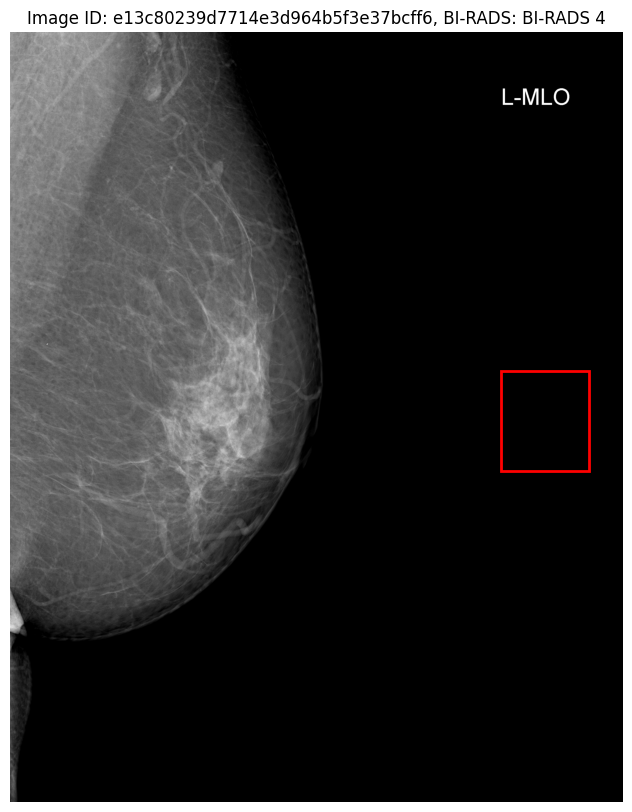

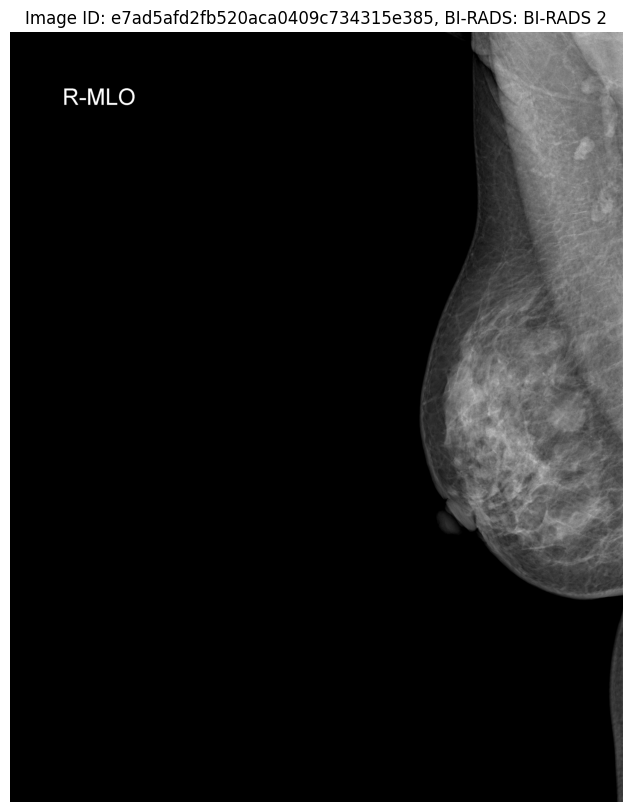

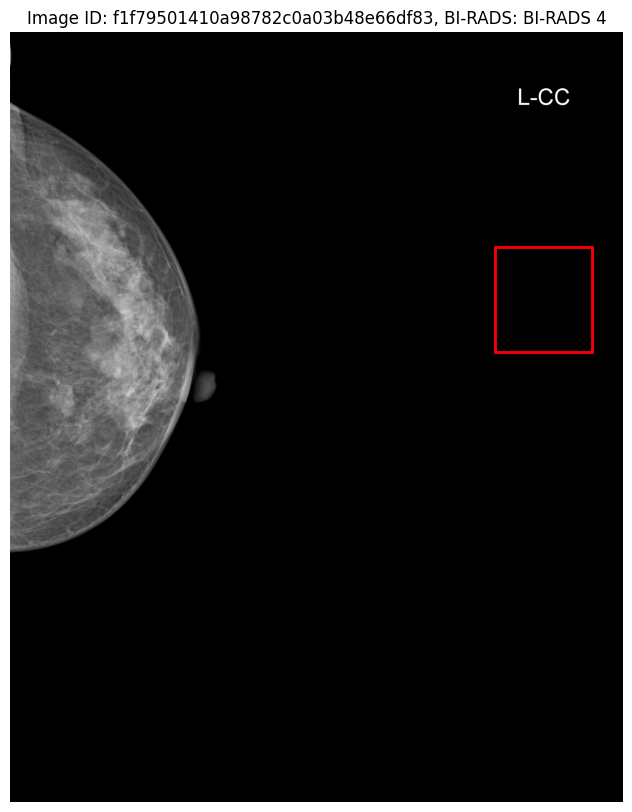

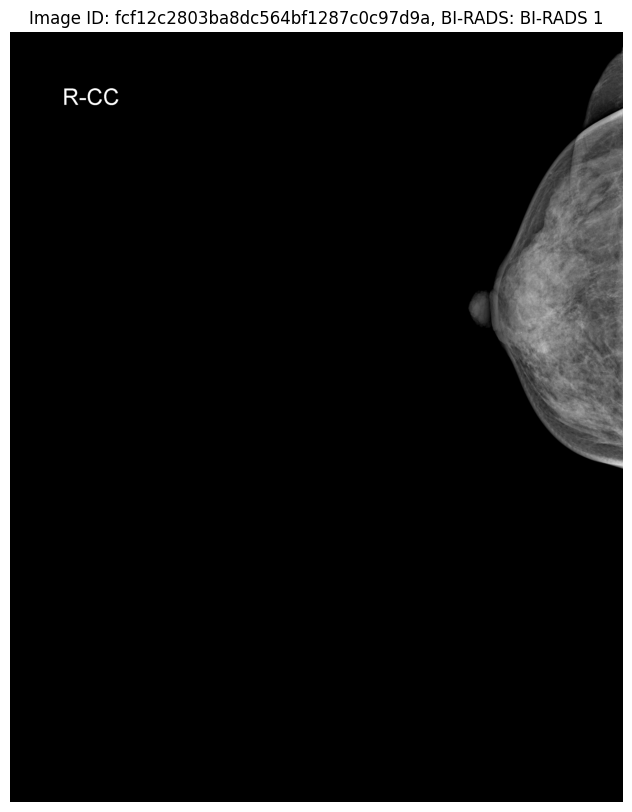

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the annotation data
df = pd.read_csv('/Users/shrutibalaji/Downloads/vindr-mammo-master 2/dicom_data/annotation_testtry1.csv')

# Create a mapping of image_ids to numbers from 1 to 30
unique_image_ids = df['image_id'].unique()
image_id_to_number = {image_id: i+1 for i, image_id in enumerate(unique_image_ids[:30])}

# Function to draw bounding box
def draw_bounding_box(ax, xmin, ymin, xmax, ymax, color='r', linewidth=2):
    width = xmax - xmin
    height = ymax - ymin
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor=color, linewidth=linewidth)
    ax.add_patch(rect)

# Function to load and display image with bounding boxes
def display_image_with_boxes(image_id, annotations):
    # Get the number for this image_id
    image_number = image_id_to_number.get(image_id)
    
    if image_number is None:
        print(f"No mapping found for image_id: {image_id}")
        return
    
    # Load the image
    image_path = f'/Users/shrutibalaji/Downloads/vindr-mammo-master 2/preprocessed_data/X_train_{image_number}.npy'
    
    try:
        image = np.load(image_path)
    except FileNotFoundError:
        print(f"Image file not found: {image_path}")
        return

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Display the image
    ax.imshow(image, cmap='gray')
    
    # Draw bounding boxes
    for _, row in annotations.iterrows():
        draw_bounding_box(ax, row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        
    # Set title
    ax.set_title(f"Image ID: {image_id}, BI-RADS: {annotations.iloc[0]['breast_birads']}")
    
    plt.axis('off')
    plt.show()

# Group annotations by image_id
grouped = df.groupby('image_id')

# Display images with bounding boxes
for image_id, annotations in grouped:
    if image_id in image_id_to_number:
        display_image_with_boxes(image_id, annotations)

Image file not found for image_id: 14bffe41f224fce0afdd90c35c0abacb
Image file not found for image_id: 16e58fc1d65fa7587247e6224ee96527
Image file not found for image_id: 17c3d032d611eb3d1baf3434d62483a1
Image file not found for image_id: 1ae7d3012efee08737b9036e20649630
Image file not found for image_id: 2098cb1050e7165044544d77bb8bfd4a


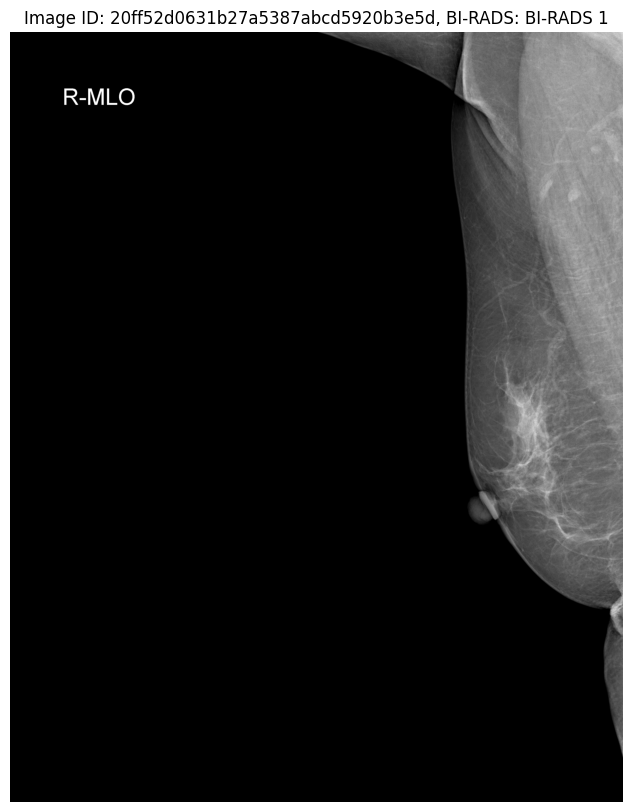

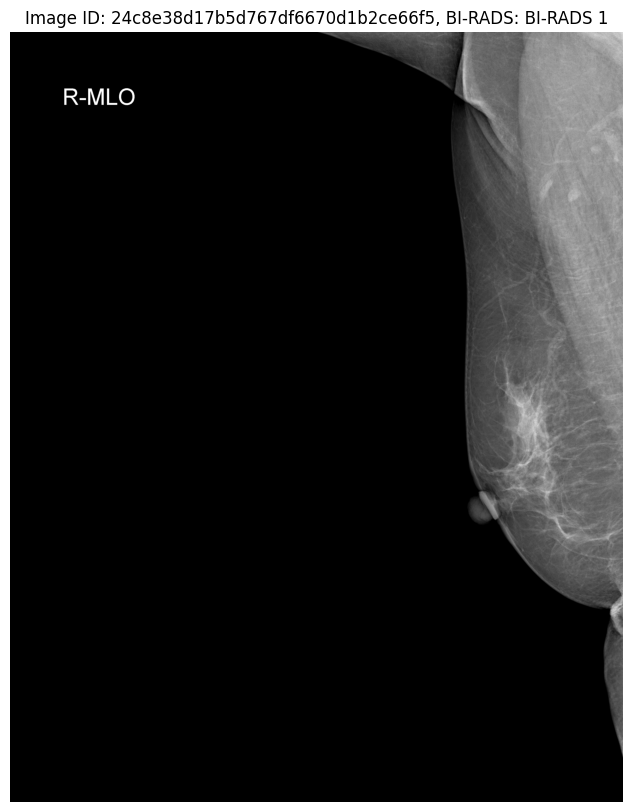

Image file not found for image_id: 265596e3534efced063b4e656b7bd64f
Image file not found for image_id: 2aca993b3b6e2a32dddd170b00fd5e7d


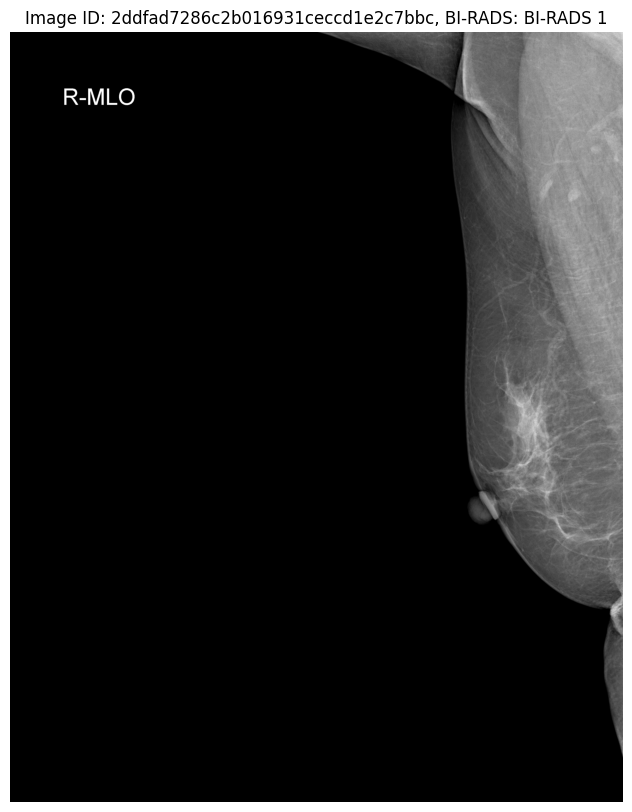

Image file not found for image_id: 31d6582c2181ae91fc2369c5b20af417
Image file not found for image_id: 3704f91985dcbc69f6ac2803523d1ecb


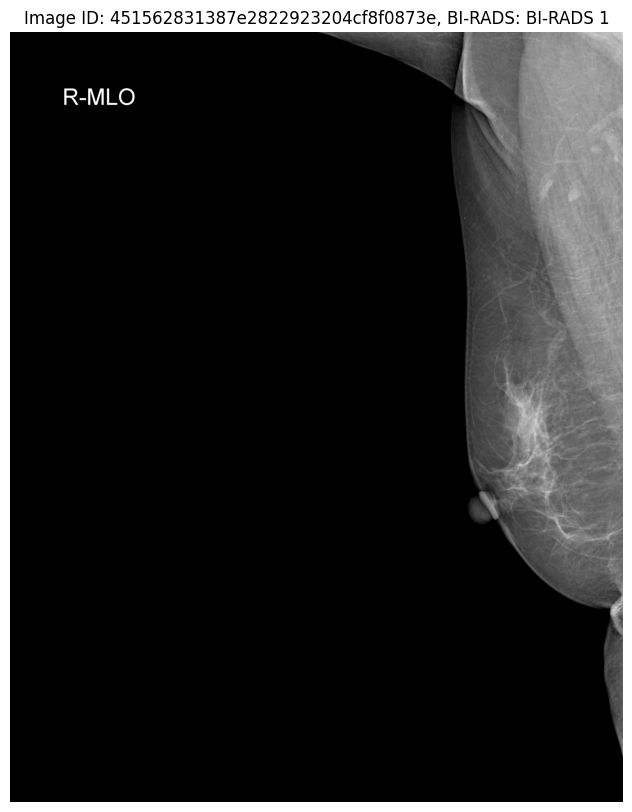

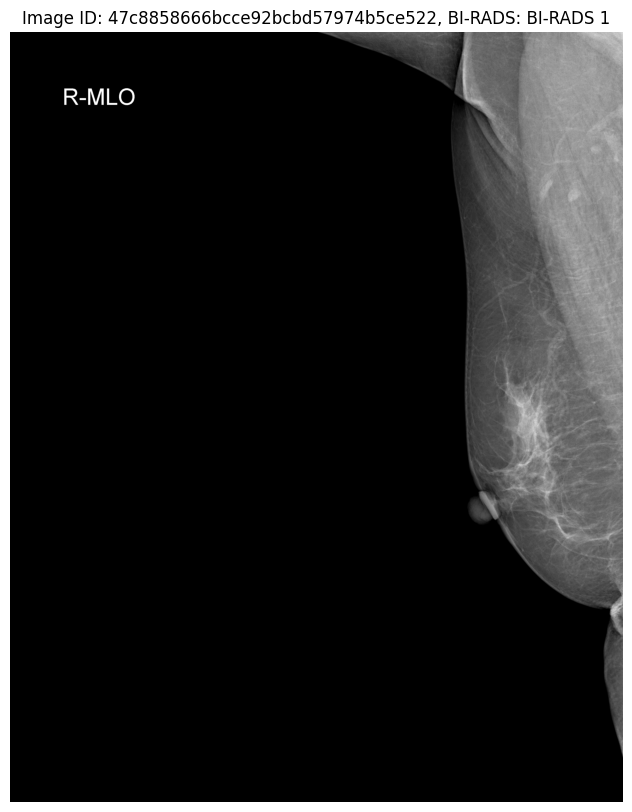

Image file not found for image_id: 552a67df6d68b8f9498db7cadd23b0e0
Image file not found for image_id: 643e9d162da220e8dbad171600375576
Image file not found for image_id: 669855e0fcbf069c4de85d4586ad8e26
Image file not found for image_id: 68f09c18925a66ef2840d4a62f237b31
Image file not found for image_id: 6e5117c49a83c06b3c8ccf26bbab657b
Image file not found for image_id: 70344c1fc8ac0185eabb0f793dda3a40
Image file not found for image_id: 7197f7e6f5ca3b9821d0460dcdc975d3
Image file not found for image_id: 78b8a2f4b10790d6b2a11e081eaf209a
Image file not found for image_id: 7fc1f1bb8bb1a7efaf7104e49c4d8b86


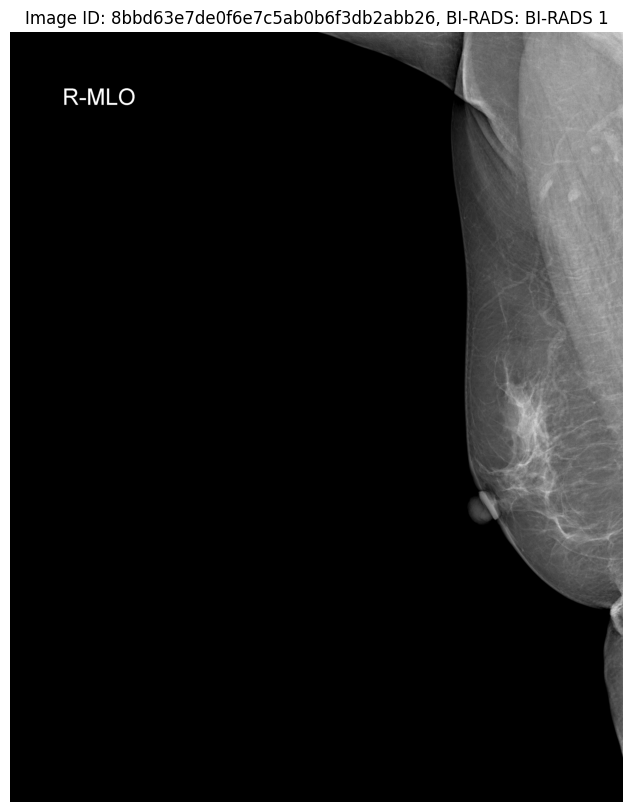

Image file not found for image_id: 8e22baa49decc916308b6b89191a49cb


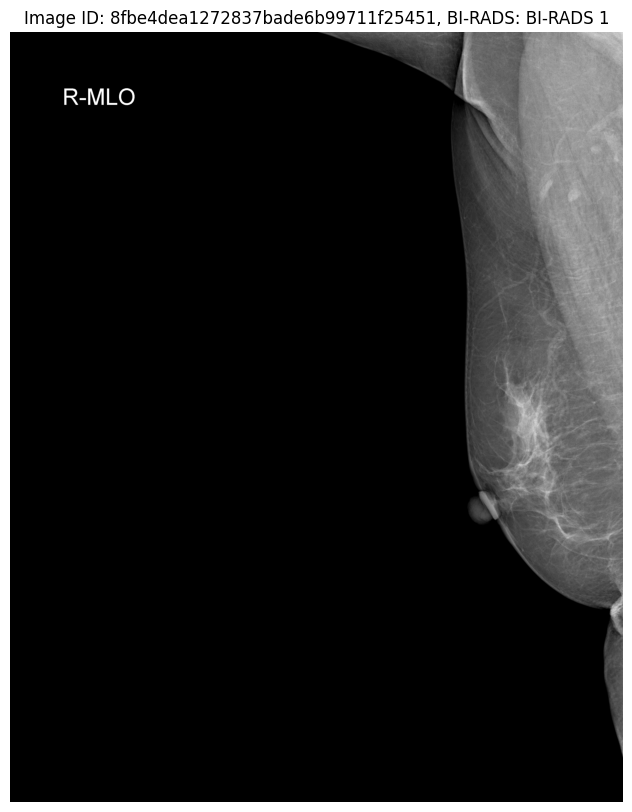

Image file not found for image_id: 97191e6e909300638a2a40c63f53a1d3
Image file not found for image_id: 9c67560e601fe9ae14381396bf9a787a
Image file not found for image_id: b664cf1e7c968896144a3a2005cd3eb4
Image file not found for image_id: c4ce68631bf70949570ded31a3c69e60
Image file not found for image_id: d39964544666ed08df9aa1e9e18d1262
Image file not found for image_id: d3ae4a0aa59a608a2823c029e988985f
Image file not found for image_id: e13c80239d7714e3d964b5f3e37bcff6
Image file not found for image_id: e7ad5afd2fb520aca0409c734315e385
Image file not found for image_id: f1f79501410a98782c0a03b48e66df83


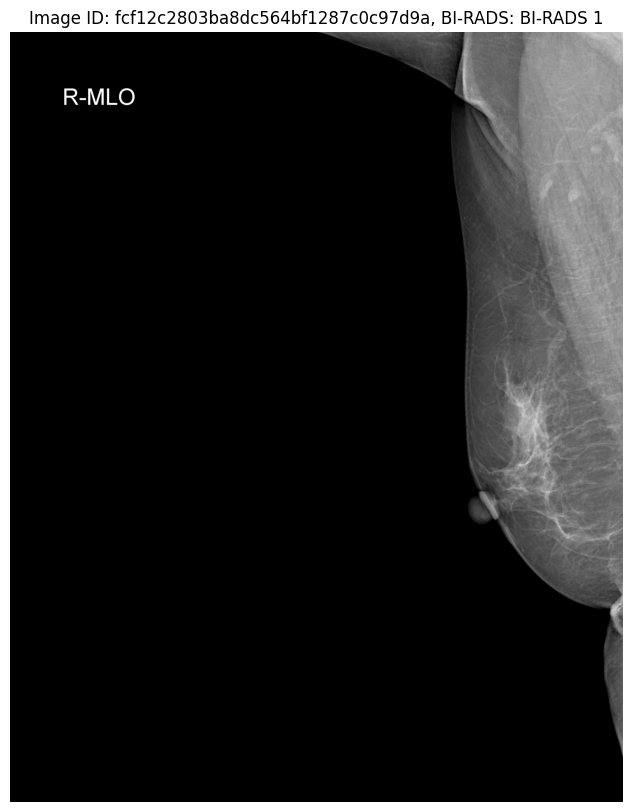

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
output_dir = '/Users/shrutibalaji/Downloads/vindr-mammo-master 2/preprocessed_data/'
# Load the annotation data
df = pd.read_csv('/Users/shrutibalaji/Downloads/vindr-mammo-master 2/dicom_data/annotation_testtry1.csv')

# Create a mapping of image_ids to numbers from 1 to 30
unique_image_ids = df['image_id'].unique()
image_id_to_number = {image_id: i+1 for i, image_id in enumerate(unique_image_ids[:31])}

# Function to draw bounding box
def draw_bounding_box(ax, xmin, ymin, xmax, ymax, color='r', linewidth=2):
    width = xmax - xmin
    height = ymax - ymin
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor=color, linewidth=linewidth)
    ax.add_patch(rect)

def display_image_with_boxes(image_id, annotations):
    # Determine if the image is in the training or test set
    split = annotations.iloc[0]['split']
    
    # Find the correct file
    for i in range(len(os.listdir(output_dir))):
        image_path = os.path.join(output_dir, f'X_{split}_{i}.npy')
        if os.path.exists(image_path):
            image = np.load(image_path)
            
            # Check if this is the correct image (you might need to adjust this check)
            if image.shape == (annotations.iloc[0]['height'], annotations.iloc[0]['width']):
                break
    else:
        print(f"Image file not found for image_id: {image_id}")
        return

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Display the image
    ax.imshow(image, cmap='gray')
    
    # Draw bounding boxes
    for _, row in annotations.iterrows():
        draw_bounding_box(ax, row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        
    # Set title
    ax.set_title(f"Image ID: {image_id}, BI-RADS: {annotations.iloc[0]['breast_birads']}")
    
    plt.axis('off')
    plt.show()

# Group annotations by image_id
grouped = df.groupby('image_id')

# Display images with bounding boxes
for image_id, annotations in grouped:
    display_image_with_boxes(image_id, annotations)

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Load the annotation data
df = pd.read_csv('/Users/shrutibalaji/Downloads/vindr-mammo-master 2/dicom_data/annotation_testtry1.csv')

# Define the output directory
OUTPUT_DIR = '/Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data'

# Create a mapping of image_ids to numbers from 0 to 31
unique_image_ids = df['image_id'].unique()
image_id_to_number = {image_id: i for i, image_id in enumerate(unique_image_ids[:32])}

# Function to draw bounding box
def draw_bounding_box(ax, xmin, ymin, xmax, ymax, color='r', linewidth=2):
    width = xmax - xmin
    height = ymax - ymin
    rect = plt.Rectangle((xmin, ymin), width, height, fill=False, edgecolor=color, linewidth=linewidth)
    ax.add_patch(rect)

# Function to load and display image with bounding boxes
def display_image_with_boxes(image_id, annotations):
    # Get the number for this image_id
    image_number = image_id_to_number.get(image_id)
    
    if image_number is None:
        print(f"No mapping found for image_id: {image_id}")
        return
    
    # Determine if the image is in the training or test set
    split = annotations.iloc[0]['split']
    if split=="training":
        split="train"
    
    # Load the image
    image_path = os.path.join(OUTPUT_DIR, f'X_{split}_{image_number}.npy')
    
    try:
        image = np.load(image_path)
    except FileNotFoundError:
        print(f"Image file not found: {image_path}")
        return

    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Display the image
    ax.imshow(image, cmap='gray')
    
    # Draw bounding boxes
    for _, row in annotations.iterrows():
        draw_bounding_box(ax, row['xmin'], row['ymin'], row['xmax'], row['ymax'])
        
    # Set title
    ax.set_title(f"Image ID: {image_id}, BI-RADS: {annotations.iloc[0]['breast_birads']}")
    
    plt.axis('off')
    plt.show()

# Group annotations by image_id
grouped = df.groupby('image_id')

# Display images with bounding boxes
for image_id, annotations in grouped:
    if image_id in image_id_to_number:
        display_image_with_boxes(image_id, annotations)

Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_train_17.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_train_13.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_train_26.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_train_20.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_train_14.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_test_23.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_test_24.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_train_31.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-master/preprocessed_data/X_test_7.npy
Image file not found: /Users/shrutibakaji/Downloads/vindr-mammo-mast